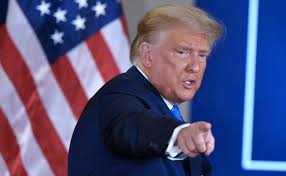

Donald Trump, Ex American President, has always been in the news due to his controversials tweets. Lets do some analysis of his tweets in last few years

# Please Upvote this kernel and if you find it helpful please keep it in your Favourite Section.

# Objective
1. Exploratory Data Analysis
2. Tweets Sentiment Analysis

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# Importing Libraries

In [ ]:
import string 
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.corpus import stopwords
from nltk.util import ngrams
from collections import defaultdict
from sklearn.feature_extraction.text import CountVectorizer
from  nltk.stem import SnowballStemmer
from sklearn.model_selection import train_test_split
from textblob import TextBlob
%matplotlib inline

# Importing data

In [ ]:
data=pd.read_csv("/kaggle/input/all-trumps-twitter-insults-20152021/trump_insult_tweets_2014_to_2021.csv")

In [ ]:
data.head()

In [ ]:
data.isnull().sum()

In [ ]:
data.info()

In [ ]:
data.shape

# Exploratory Data Analysis

In [ ]:
data['target'].value_counts()

# Most Targetted Areas

In [ ]:
fig,ax1=plt.subplots(figsize=(8,8))
g=sns.barplot(x=data['target'].value_counts()[:10],y=data['target'].value_counts()[:10].index)
g.set_ylabel('Tweet Targets')
g.set_xlabel('Number of Tweets')
g.set_title('Most Targetted areas')

# Most Insults done

In [ ]:
year=[]
for x in data['date']:
    a=x.split('-')
    year.append(a[0])
data['year']=year
fig, axs = plt.subplots(7,1, figsize=(18, 30), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = .5, wspace=.001)
axs = axs.ravel()
for i in range(0,7):
    x=data[data['year']==str(2015+i)]['target'].value_counts()[:10]
    y=data[data['year']==str(2015+i)]['target'].value_counts()[:10].index
    axs[i].bar(y,x)
    axs[i].set_xlabel('Tweet Targets')
    axs[i].set_ylabel('Number of Tweets')
    axs[i].set_title(f'Most Tweets in year {2015+i}')
plt.tight_layout()

# Number of tweets for Insults

In [ ]:
fig,ax1=plt.subplots(figsize=(8,8))
data['insult']=data['insult'].str.lower()
g=sns.barplot(x=data['insult'].value_counts()[:10],y=data['insult'].value_counts()[:10].index)
g.set_ylabel('Tweet Insults')
g.set_xlabel('Number of Tweets')
g.set_title('Most Insults done')

# Year-wise Insults

In [ ]:
fig, axs = plt.subplots(7,1, figsize=(18, 30), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = .5, wspace=.001)
axs = axs.ravel()
for i in range(0,7):
    x=data[data['year']==str(2015+i)]['insult'].value_counts()[:10]
    y=data[data['year']==str(2015+i)]['insult'].value_counts()[:10].index
    axs[i].bar(y,x)
    axs[i].set_xlabel('Tweet Insults')
    axs[i].set_ylabel('Number of Tweets')
    plt.xticks(rotation=90)
    axs[i].set_title(f'Most Insults in year {2015+i}')
plt.tight_layout()

# Most Insults done of Targets

In [ ]:
most_targetted=data['target'].value_counts()[:5].index
fig, axs = plt.subplots(5,1, figsize=(18, 30), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = .5, wspace=.001)
axs = axs.ravel()
for i in range(0,5):
    x=data[data['target']==most_targetted[i]]['insult'].value_counts()[:10]
    y=data[data['target']==most_targetted[i]]['insult'].value_counts()[:10].index
    axs[i].bar(y,x)
    axs[i].set_xlabel(f'Insults of {most_targetted[i]}')
    axs[i].set_ylabel('Number of Tweets')
    axs[i].set_title(f'Most Insults done of {most_targetted[i]}')
plt.tight_layout()

# Sentiment Analysis

**Before doing the sentiment analysis we have to remove the stop words that have been used in the tweets**

In [ ]:
stop_words = stopwords.words("english")
stemmer = SnowballStemmer("english")

def preprocess(text, stem=False):
    text = str(text).lower().strip()
    tokens = []
    for token in text.split():
        if token not in stop_words:
            if stem:
                tokens.append(stemmer.stem(token))
            else:
                tokens.append(token)
    return " ".join(tokens)
data['tweet']=data['tweet'].apply(lambda x:preprocess(x))

**Lets create bigrams for the corpus**

In [ ]:
def get_tweet_bigram(corpus,n):
    vec=CountVectorizer(ngram_range=(2,2))
    bow=vec.fit_transform(corpus)
    sum_word=bow.sum(axis=0)
    word_freq=[(x,sum_word[0,i]) for x,i in vec.vocabulary_.items()]
    word_freq=sorted(word_freq,key=lambda x:x[1],reverse=True)
    return word_freq[:n]

**Lets see the most common bigrams**

In [ ]:
plt.figure(figsize=(10,5))
top_tweet_bigram=get_tweet_bigram(data['tweet'],10)
x,y=map(list,zip(*top_tweet_bigram))
sns.barplot(y,x)

*As we can see there are a lot of links that has been used in the tweets so first we'll remove those*

**Removing the links**

In [ ]:
def remove_links(corpus):
    pattern=re.compile(r'https?://\S+|www\.\S+')
    return pattern.sub(r'',corpus)
data['tweet']=data['tweet'].apply(lambda x:remove_links(x))

**Removing HTML tags(if any)**

In [ ]:
def remove_html(corpus):
    pattern=re.compile(r'<.*?>')
    return pattern.sub(r'',corpus)
data['tweet']=data['tweet'].apply(lambda x:remove_html(x))

**Removing any emoji**

In [ ]:
def remove_emoji(string):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string)
data['tweet']=data['tweet'].apply(lambda x:remove_emoji(x))

**Removing punctuations**

In [ ]:
def remove_punct(text):
    table=str.maketrans('','',string.punctuation)
    return text.translate(table)
data['tweet']=data['tweet'].apply(lambda x:remove_punct(x))

**Lets check the bigrams again after cleaning the data**

In [ ]:
plt.figure(figsize=(10,5))
top_tweet_bigram=get_tweet_bigram(data['tweet'],10)
x,y=map(list,zip(*top_tweet_bigram))
sns.barplot(y,x)

*As you can see the links have been removed from the data*

**Lets check the polarity of the data**

In [ ]:
def getPolarity(text):
   return TextBlob(text).sentiment.polarity
data['polarity']=data['tweet'].apply(lambda x: getPolarity(x))

In [ ]:
def getAnalysis(score):
 if score < 0:
  return 'Negative'
 elif score == 0:
  return 'Neutral'
 else:
  return 'Positive'
data['Analysis'] = data['polarity'].apply(getAnalysis)


**Pie chart for the polarity of the data**

In [ ]:
plt.subplots(figsize=(8,8))
plt.pie(x=data['Analysis'].value_counts(),labels=data['Analysis'].value_counts().index,autopct='%1.1f%%',
        shadow=True, startangle=180)

**Finally the barplot for this polarity**

In [ ]:
plt.subplots(figsize=(5,5))
g=sns.barplot(x=data['Analysis'].value_counts(),y=data['Analysis'].value_counts().index)
g.set_ylabel('Sentiments')
g.set_xlabel('Number of Tweets')
g.set_title('Sentiment Analysis - Number of Tweets')

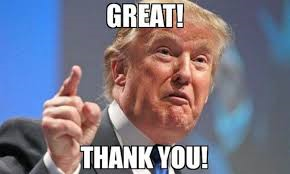

# Please upvote the notebook

# Thanks from me and Donald Trump...!!